This is the Jupyter Notbook containing the code used to analyse the data obtained from the Optical Pumping experiment carried out in during Nov/Dec 2018

Here are the Libraries used throughout the document

In [1]:
#Libraries
import time;
import datetime;
from numpy import *;
import matplotlib.pyplot as plt;
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D;
from scipy import optimize;

# Statistical Analysis
## Functions
Each of the Functions are defined here

In [2]:
#Define Functions
def Calib(x,m,c): # Maps Current values onto Flux Density Values.
    return m*x + c

def NuFit(x,a,b,c,d): # Fits for Resonant Frequency against Flux Density.
    return a*sqrt(abs(b)+(x+c)**2) + d;

    # Fits for Flux Density agains Resonant Frequency,
    # only works for measured values.
    # Function is composite of two one to one functions
    # since the curvefit struggles with
    # many to one graphs.
def MagFit(x,a,b,c,d):
    t = []
    for i in range(len(B)):
        if B[i] >= -c: 
            #If the real data is less than the model's predicted turning point 
            t.append(+(sqrt(((x[i]-d)/a)**2 + b) - c))
        else: #otherwise
            t.append(-(sqrt(((x[i]-d)/a)**2 + b) + c))
    return t

## Raw Data
The Raw data from the experiment is stored here

In [3]:
#Define Calibration Data
#                      B (mT) dB     I (A)  dI
Calibration = array([[ 0.15 , 0.02 , 0.50 , 0.01],
                     [ 0.20 , 0.01 , 0.70 , 0.01],
                     [ 0.22 , 0.02 , 0.90 , 0.01],
                     [ 0.26 , 0.02 , 1.10 , 0.01],
                     [ 0.28 , 0.01 , 1.30 , 0.01],
                     [ 0.30 , 0.01 , 1.40 , 0.01],
                     [ 0.34 , 0.01 , 1.60 , 0.01],
                     [ 0.37 , 0.01 , 1.80 , 0.01],
                     [ 0.39 , 0.01 , 2.00 , 0.01],
                     [ 0.42 , 0.01 , 2.20 , 0.01]]);

#Define Raw Data
#               I (A)    dI    V (Hz)      dV
Data = array([[-1.050 , .001 , 505000.00 , 1000.],
              [-1.000 , .001 , 479000.00 , 1000.],
              [- .950 , .001 , 453400.00 , 1000.],
              [- .900 , .001 , 429900.00 , 1000.],
              [- .850 , .001 , 405400.00 , 1000.],
              [- .800 , .001 , 378400.00 , 1000.],
              [- .750 , .001 , 353800.00 , 1000.],
              [- .700 , .001 , 329300.00 , 1000.],
              [- .650 , .001 , 306100.00 , 1000.],
              [- .600 , .001 , 284600.00 , 1000.],
              [- .550 , .001 , 262000.00 , 1000.],
              [- .500 , .001 , 238000.00 , 1000.],
              [- .4000 ,.001 , 194000.00 , 1000.],
              [- .3503 ,.001 , 178000.00 , 2000.],
              [- .3022 ,.001 , 171000.00 , 2000.],
              [- .2508 ,.001 , 164000.00 , 5000.],
              [- .1772 ,.002 , 161000.00 ,10000.],
              [- .1004 ,.001 , 160000.00 ,10000.],
              [- .0502 ,.001 , 160000.00 ,10000.],
              [+ .0000 ,.001 , 163000.00 ,10000.],             
              [+ .0502 ,.001 , 179200.00 ,10000.],
              [+ .1006 ,.001 , 201500.00 , 1000.],
              [+ .1526 ,.001 , 221900.00 ,  500.],
              [+ .2023 ,.001 , 244000.00 ,  500.],
              [+ .2497 ,.001 , 265200.00 , 1000.],
              [+ .3000 ,.001 , 288300.00 , 1000.],
              [+ .4000 ,.001 , 336800.00 , 1000.],
              [+ .500 , .001 , 382000.00 , 1000.],
              [+ .540 , .001 , 404700.00 , 1000.],
              [+ .600 , .001 , 432000.00 , 1000.],
              [+ .650 , .001 , 457500.00 , 1000.],
              [+ .700 , .001 , 483400.00 , 1000.],
              [+ .750 , .001 , 509000.00 , 1000.],
              [+ .800 , .001 , 532500.00 , 1000.],
              [+ .850 , .001 , 562300.00 , 1000.],
              [+ .900 , .001 , 586500.00 , 1000.],
              [+ .950 , .001 , 610900.00 , 1000.],
              [+1.000 , .001 , 638000.00 , 1000.],
              [+1.050 , .001 , 662100.00 , 1000.]]);

## Fitting
At this point it is necessary to assign the variables their own list according to the raw data to make the code more readable later on.

For ease of access the physical constants used in this experiment and one measured reoccuring variable has been stored here to be reference later on throughout the code.

This occurs here and also fits the data to the appropriate function as well as calculating the goodness of fit for each of the curve fits.

Notice that there are two fits for the raw data, one is fitting $B$ against $\nu$ (MagFit) one is fitting $\nu$ against $B$ (NuFit), Looking in hindsight both fits give remarkably similar coefficients however MagFit has a significantly lower $\chi^2_\nu$ due to the higher error on $B$ than $\nu$

In [9]:
    #Constants
quality = 3 #Used to change image quality
            #(Makes code run faster unless you want to save pretty pictures)
#Calculating the accepted value of gf
F = 4   # Total Atomic Spin
I = 3.5 # Nuclear spin obtained from Caesium Data Sheet on Canvas
J= 0.5  # Total angular momentum of the electron
Accepted_gf = 2.0023193043737*((F*(F+1))-I*(I+1)+J*(J+1))/(2*F*(F+1))

mu0 = 1.2566370614e-6 #Vacuum Permeability
_muB = 9.274009994e-24 #Bohr Magneton
N = 50                 #Number of Turns in Helmholtz Coils
h = 6.63e-34           #Planck's Constant
R  = 0.30550           #Measured average radius of Helmholtz Coils
dR = 0.00061           #Error on average radius


         #FITTING CALIBRATION DATA
#Assign Calibration Data to individual lists
_B  = Calibration[:,0]/1000 #the thousand converts the value to SI Units
_dB = Calibration[:,1]/1000
_I  = Calibration[:,2]
_dI = Calibration[:,3]

    #Fit the regression to the Calibration Data
CaCo, CaCv = optimize.curve_fit(Calib,_I,_B)
CaChi = sum([((j - i)/dj)**2
             for i, j, dj 
             in zip(Calib(_I,CaCo[0],CaCo[1]),_B,_dB) ])/(len(_I)-len(CaCo))


        #FITTING RAW DATA
I  = Data[:,0]; #Helmholtz Coil Current
dI = Data[:,1]; #Error in Current
V  = Data[:,2]; #Resonant Frequency
dV = Data[:,3]; #Error in Frequency

    #Calibrative generation of B
B  = [Calib(i,CaCo[0],CaCo[1]) for i in I]
dB = [sqrt(i**2*CaCv[0,0] + CaCo[0]**2 * di + CaCv[1,1])
      for i,di in zip(I,dI)]
if True: #If TRUE Replace Calibration of B with Helmholtz determined B?
        B  = [i*(8 * mu0 * N)/(125**0.5*R) for i    in I]
        dB = [(((8 * mu0 * N*i * dR)/(125**0.5*R**2))**2 + 
              ((8*mu0 * N *di)/(125**0.5 * R))**2)**0.5
              for i,di in zip(I,dI)]

    #Fit the NuFit to the Raw Data and calculate Goodness of Fit
NuCo, NuCv = optimize.curve_fit(NuFit,B,V,
        p0 = [7.5e+09,3.5e-15,1.1e-05,1.0e+04]);
NuChi = sum([((j - i)/dj)**2
             for i, j, dj in 
             zip(NuFit(B,NuCo[0],NuCo[1],NuCo[2],NuCo[3]),V,dV) ])/(len(I)-len(NuCo))

    #Fit the MagFit to the Raw Data and calculate Goodness of Fit

MaCo, MaCv = optimize.curve_fit(MagFit,V,B, p0 = NuCo)
MaChi = sum([((j - i)/dj)**2
             for i, j, dj 
             in zip(MagFit(V,MaCo[0],MaCo[1],MaCo[2],MaCo[3]),B,dB) ])/(len(V)-len(MaCo))
print(CaCo)
print(CaChi)
print(NuChi)
print(MaChi)

[1.56283186e-04 8.20176990e-05]
0.375708944485539
3.5274703193759063
194.6841774658697


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


# Results

From these fits we can determine the unknown values of this experiment
Here the value of $N$ is derived from the Calibration data and the $g_F$ and $B_{Earth}$ value is derived from the NuFit Calculated coefficients


In [5]:
N = (sqrt(125)* CaCo[0]*R)/(8*mu0)
dN = sqrt(((sqrt(125)*R*sqrt(CaCv[0,0]))/(8*mu0))**2
          + ((sqrt(125)*CaCo[0]*dR)/(8*mu0))**2)
print("N = " + str(N) + " ± " + str(dN))
print("Sigma Deviance =" + str((N-50)/dN))
print()

gf  = NuCo[0]*h/_muB
dgf = sqrt(NuCv[0,0])*h/_muB
print("gf = " + str(gf) + " ± " + str(dgf))
print("Sigma Deviance =" + str((gf-Accepted_gf)/dgf))
print()

BEarth = sqrt(NuCo[1] + NuCo[2]**2)
dBEarth = sqrt((NuCv[1,1])/(4*NuCo[1] + 4*NuCo[2])
               + (NuCo[2]**2*NuCv[2,2])/(NuCo[2]**2 + NuCo[1]))
print("B-Earth = " + str(BEarth) + " ± " + str(dBEarth))
print("Sigma Deviance =" + str((BEarth-48e-6)/dBEarth))
print()

N = 53.09805658761179 ± 1.452709392008412
Sigma Deviance =2.132605877441623

gf = 0.2623087929147447 ± 0.0028420743047863793
Sigma Deviance =4.228911203268335

B-Earth = 4.767593944595741e-05 ± 9.760941807911598e-08
Sigma Deviance =-3.31997219551018



The Values derived from the seperate MagFit function are listed below

In [6]:
gf  = MaCo[0]*h/_muB
dgf = sqrt(MaCv[0,0])*h/_muB
print("gf = " + str(gf) + " ± " + str(dgf))
print("Sigma Deviance =" + str((gf-Accepted_gf)/dgf))
print()

BEarth = sqrt(abs(MaCo[1]) + MaCo[2]**2)
dBEarth = sqrt((MaCv[1,1])/(4*abs(MaCo[1]) + 4*MaCo[2])
               + (MaCo[2]**2*MaCv[2,2])/(MaCo[2]**2 + abs(MaCo[1])))
print("B-Earth = " + str(BEarth) + " ± " + str(dBEarth))
print("Sigma Deviance =" + str((BEarth-48e-6)/dBEarth))
print()

gf = 0.2694462747034611 ± 0.006862345256476764
Sigma Deviance =2.791518196882998

B-Earth = 5.180587464212885e-05 ± 1.911172222651854e-07
Sigma Deviance =19.91382355300241



# Plots and Output
## Calibration
Here we plot the Calibration Curve from the data and save the calibration coefficients to a file including the $\chi^2_\nu$ and the Covariance Matrix.

n


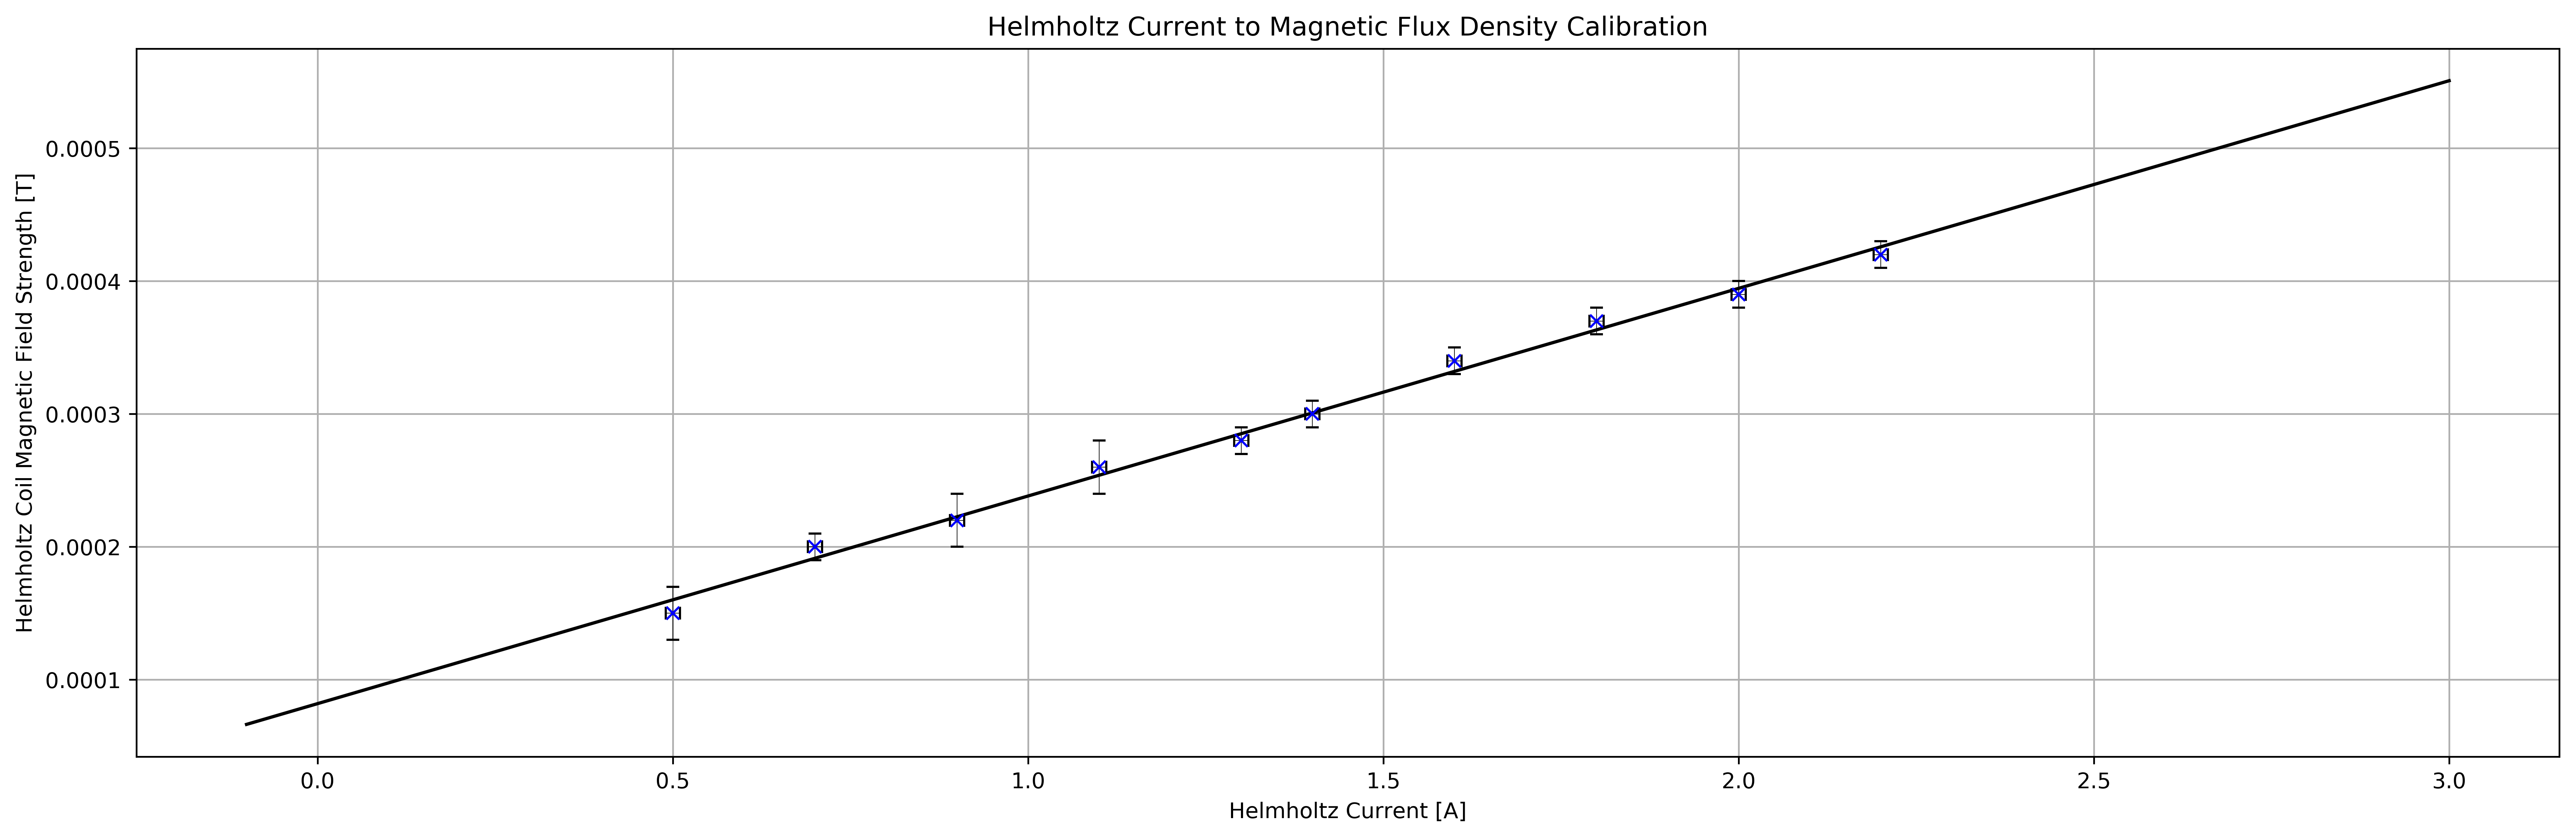

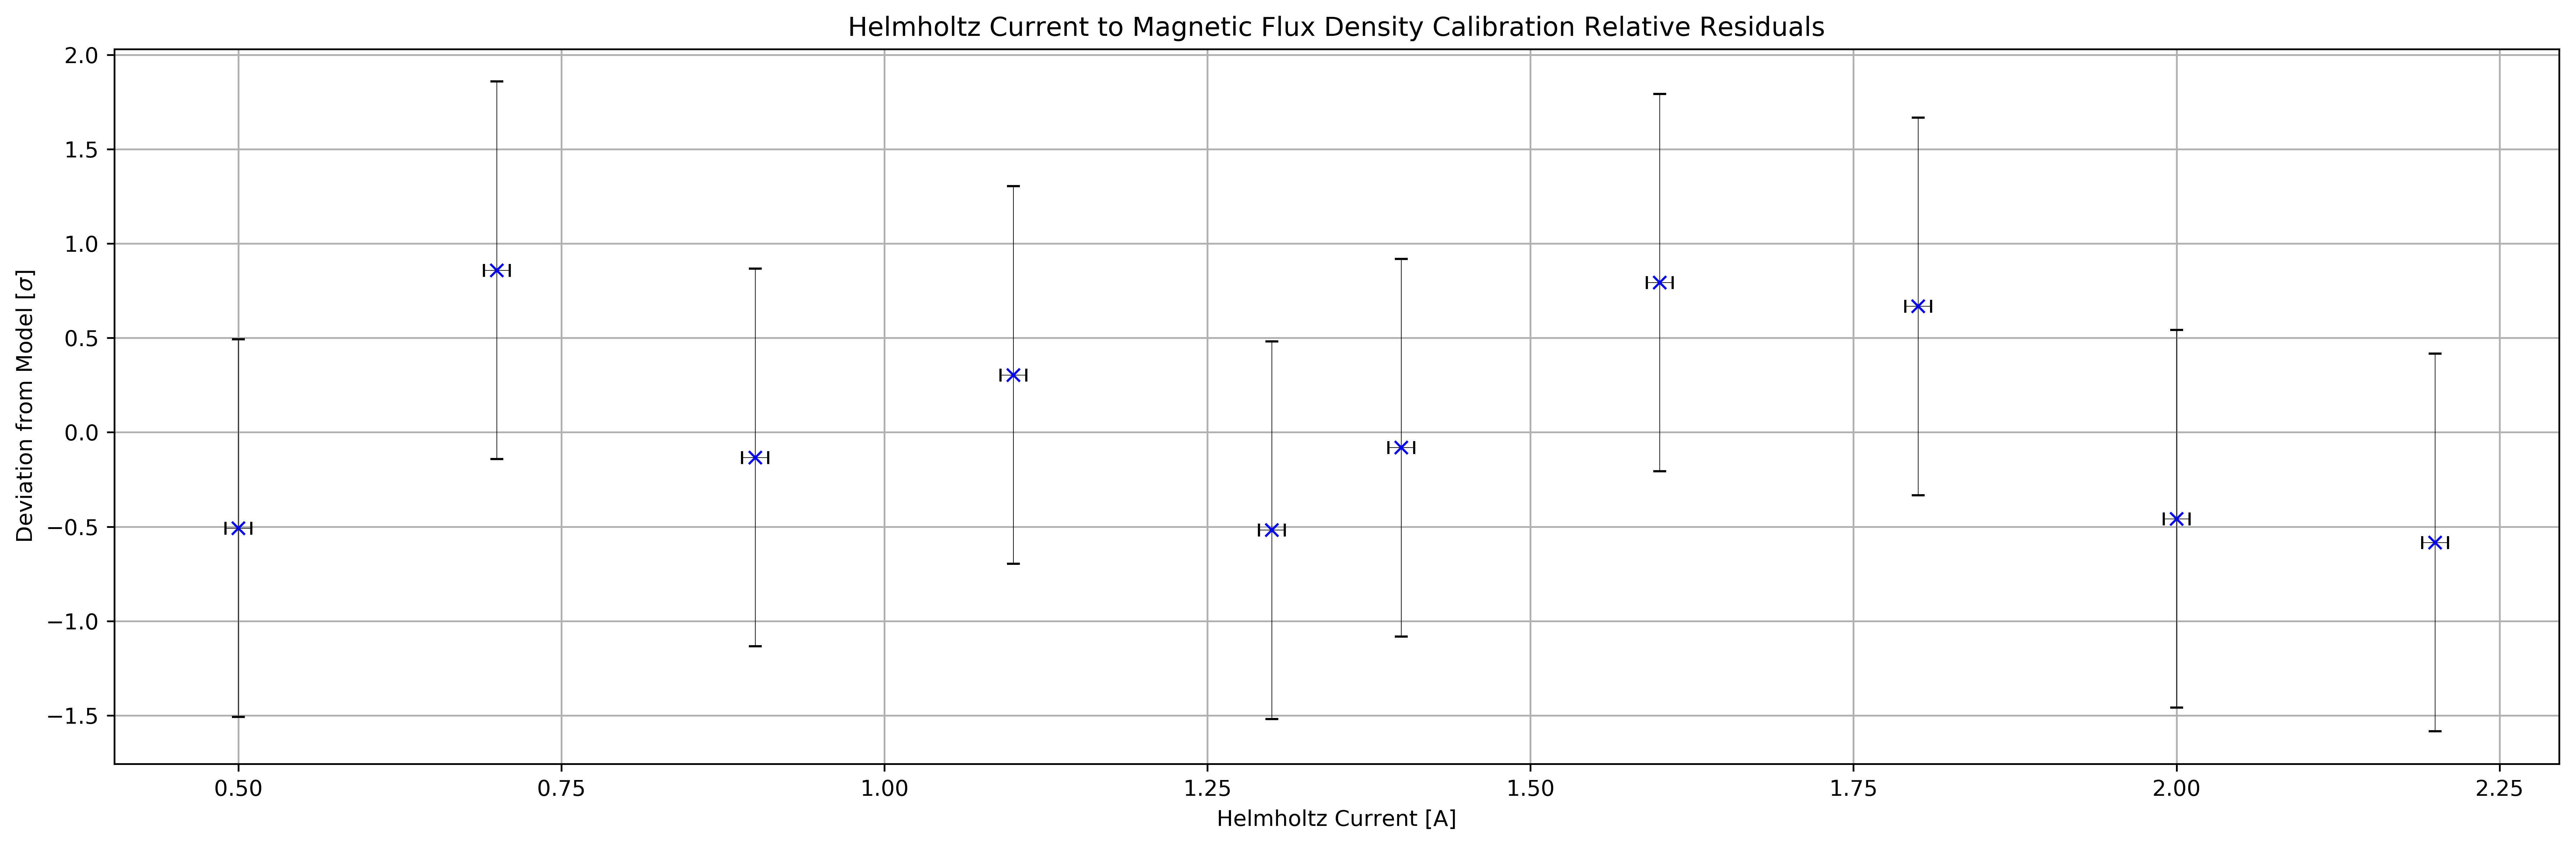

Finished


In [17]:
    #CALIBRATION FIT
#Create Smooth-Esque range
x = linspace(-0.1,3,100);

filename = input()
#Plot Fitted Data
image = plt.figure(num=None, figsize=(20, 6), dpi= (200 + quality *80));
plt.errorbar(_I,_B,_dB,_dI,'bx','k',0.3,3);
plt.plot(x,Calib(x,CaCo[0],CaCo[1]),'k-');
plt.grid(True);
plt.title("Helmholtz Current to Magnetic Flux Density Calibration");
plt.ylabel(r'Helmholtz Coil Magnetic Field Strength [T]');
plt.xlabel(r'Helmholtz Current [A]');
plt.show();
if(filename != "n"):
        image.savefig("Calibration\\Data\\" + filename +" "
            + datetime.datetime.fromtimestamp(time.time())
                      .strftime('%Y-%m-%d %H,%M,%S, '))
    
#Plot Residual Data
image = plt.figure(num=None, figsize=(20, 6), dpi= (200 + quality *80), facecolor='w', edgecolor='k');
_Resid = [(j-Calib(i,CaCo[0],CaCo[1]))/dj for j,dj,i in zip(_B,_dB,_I)]

plt.errorbar(_I,_Resid,ones(len(_Resid)),_dI,'bx','k',0.3,3);
plt.grid(True);
plt.title("Helmholtz Current to Magnetic Flux Density "
          + "Calibration Relative Residuals");
plt.ylabel(r'Deviation from Model [$\sigma$]');
plt.xlabel(r'Helmholtz Current [A]');
plt.show();
if(filename != "n"):
        image.savefig("Calibration\\Residuals\\" + filename +" "
            + datetime.datetime.fromtimestamp(time.time())
                      .strftime('%Y-%m-%d %H,%M,%S, '))

        file = open("Calibration\\Details\\" + filename +" "
            + datetime.datetime.fromtimestamp(time.time())
                      .strftime('%Y-%m-%d %H,%M,%S, '),"w")

        file.write("m = " + str(CaCo[0]) +"\n")
        file.write("c = " + str(CaCo[1]) +"\n")
        file.write("ChiSqu = " + str(CaChi) +"\n")
    
        file.write("\n")
    
        file.write(str(CaCv))

        file.close()
print("Finished");

## $\nu$ against $B$
Here we plot the raw data using the NuFit function to smooth and extrapolate the data, and save the fitting coefficients to a file including the $\chi^2_\nu$ and the Covariance Matrix.

n


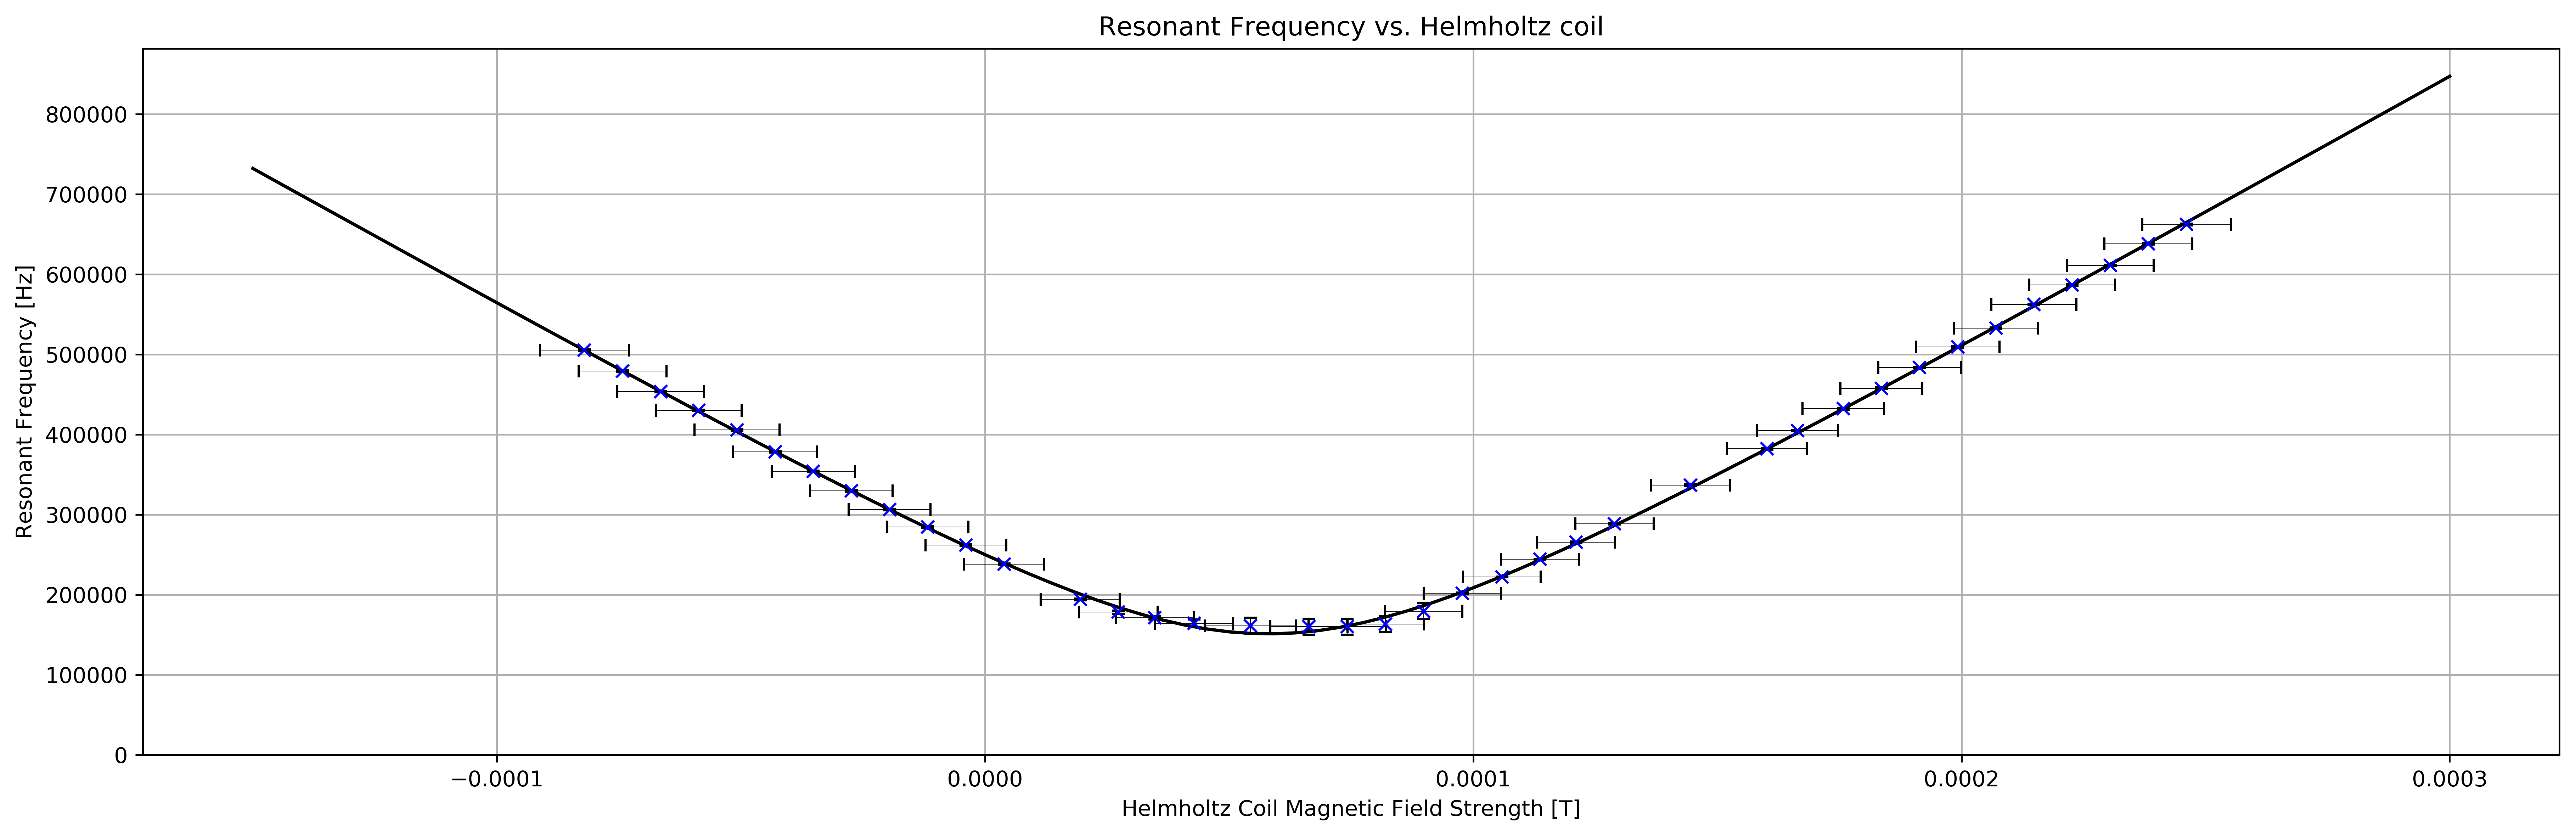

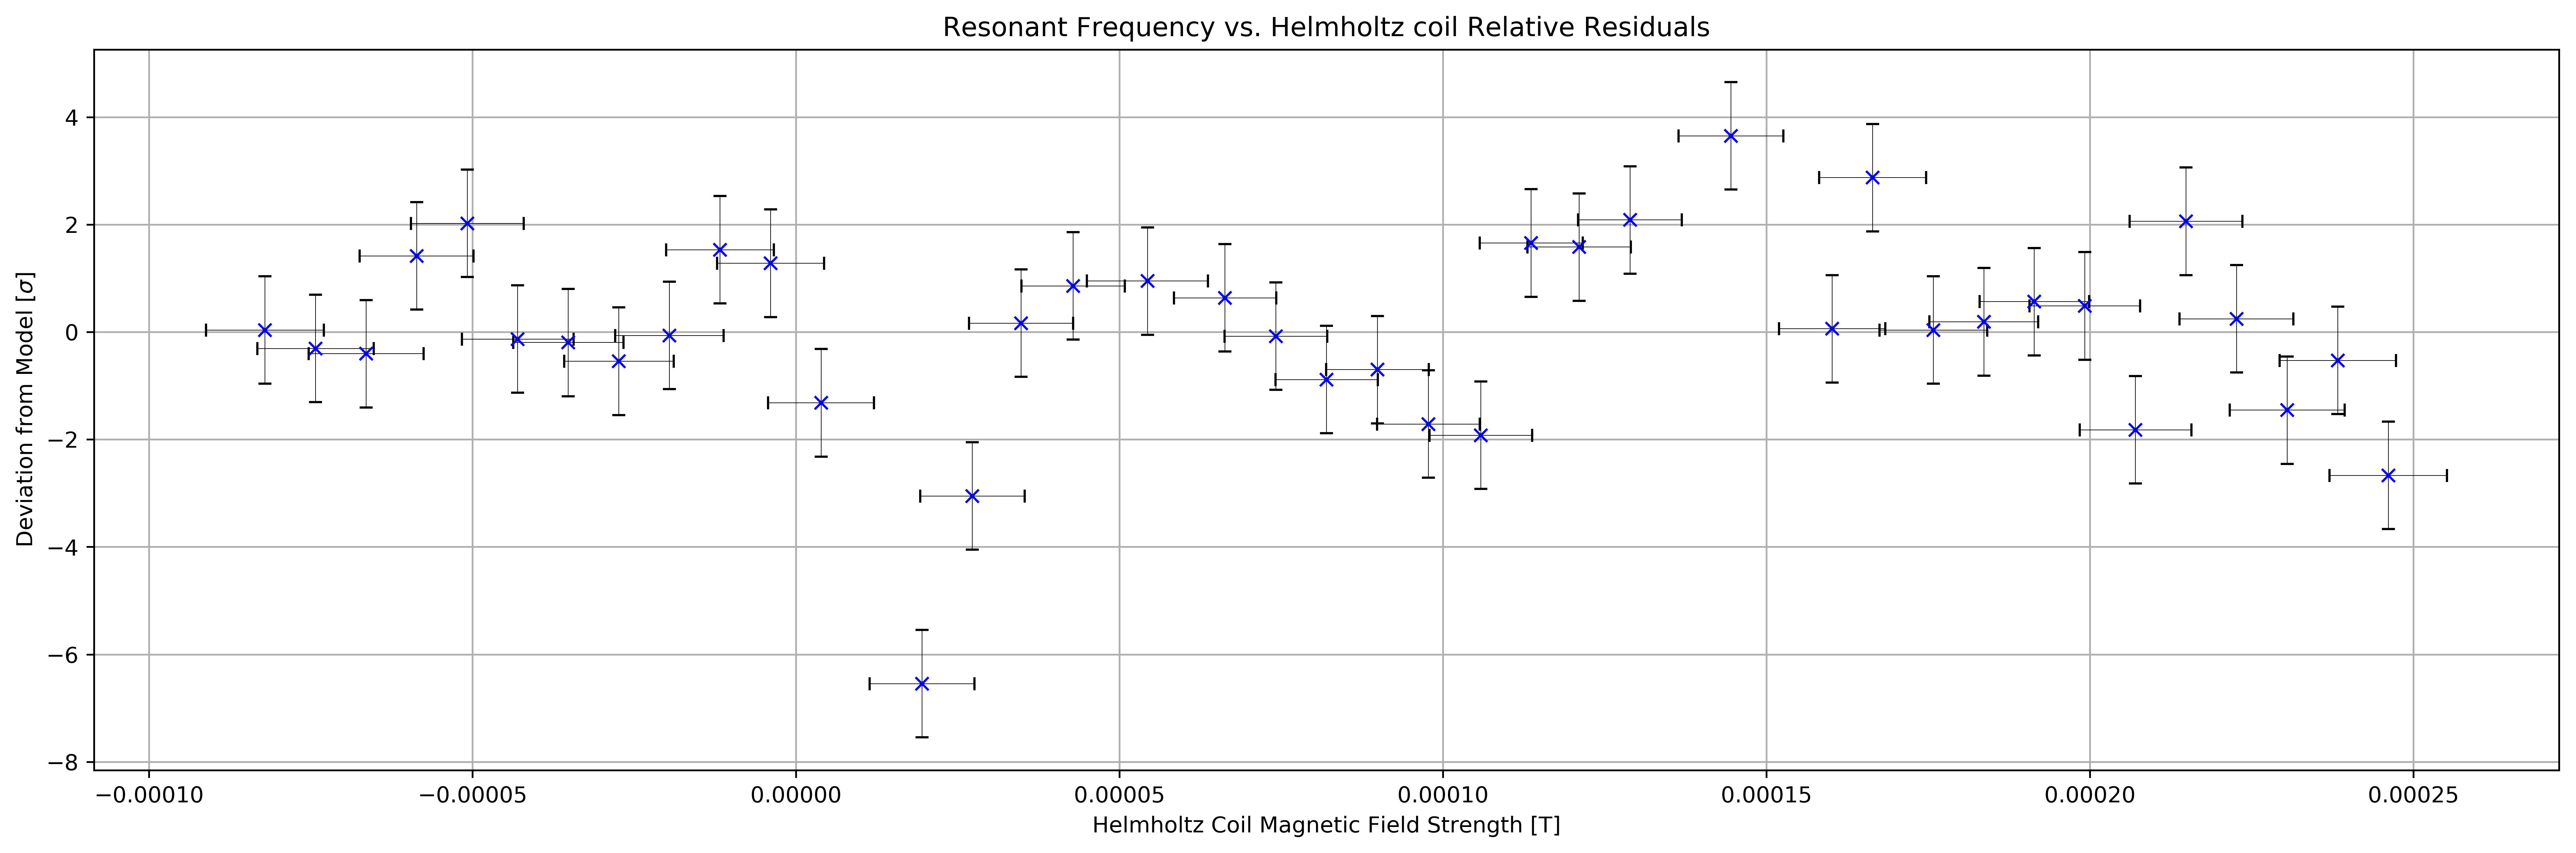

Finished


In [18]:
    #DATA FIT
#Create Smooth-Esque range
x = linspace(-15e-5,30e-5,100);

filename = input()

#Plot Fitted Data
image = plt.figure(num=None, figsize=(20, 6), dpi=(200 + quality *80));
plt.errorbar(B,V,dV, dB,'bx','k',0.3,3);
plt.plot(x,NuFit(x,NuCo[0],NuCo[1],NuCo[2],NuCo[3]),'k-');
plt.grid(True);
plt.title("Resonant Frequency vs. Helmholtz coil");
plt.xlabel(r'Helmholtz Coil Magnetic Field Strength [T]');
plt.ylabel(r'Resonant Frequency [Hz]');
plt.ylim(0)
plt.show();
if(filename != "n"):
        image.savefig("NuFit\\Data\\" + filename +" "
            + datetime.datetime.fromtimestamp(time.time())
                      .strftime('%Y-%m-%d %H,%M,%S, '))
    
#Plot Residual Data
image = plt.figure(num=None, figsize=(20, 6), dpi=(200 + quality *80));
Resid = [(j-NuFit(i,NuCo[0],NuCo[1],NuCo[2],NuCo[3]))/dj
         for j,dj,i in zip(V,dV,B)]

plt.errorbar(B,Resid,ones(len(Resid)),dB,'bx','k',0.3,3);
plt.grid(True);
plt.title("Resonant Frequency vs. Helmholtz coil Relative Residuals");
plt.xlabel(r'Helmholtz Coil Magnetic Field Strength [T]');
plt.ylabel(r'Deviation from Model [$\sigma$]');
plt.show();


if(filename != "n"):
        image.savefig("NuFit\\Residuals\\" + filename +" "
            + datetime.datetime.fromtimestamp(time.time())
                      .strftime('%Y-%m-%d %H,%M,%S, '))

        file = open("NuFit\\Details\\" + filename +" " 
            + datetime.datetime.fromtimestamp(time.time())
                    .strftime('%Y-%m-%d %H,%M,%S, '),"w")

        file.write("a = " + str(NuCo[0]) +"\n")
        file.write("b = " + str(NuCo[1]) +"\n")
        file.write("c = " + str(NuCo[2]) +"\n")
        file.write("d = " + str(NuCo[3]) +"\n")
        file.write("ChiSqu = " + str(NuChi) +"\n")
    
        file.write("\n")
    
        file.write(str(NuCv))

        file.close()
print("Finished");

## $B$ against $\nu$
Here we plot the raw data using the MagFit function to plot the data, and save the fitting coefficients to a file including the $\chi^2_\nu$ and the Covariance Matrix.

Note that this function will only approximate the set of X values in the raw data since the process of stitching the two functions together requires a comparison with raw data


n


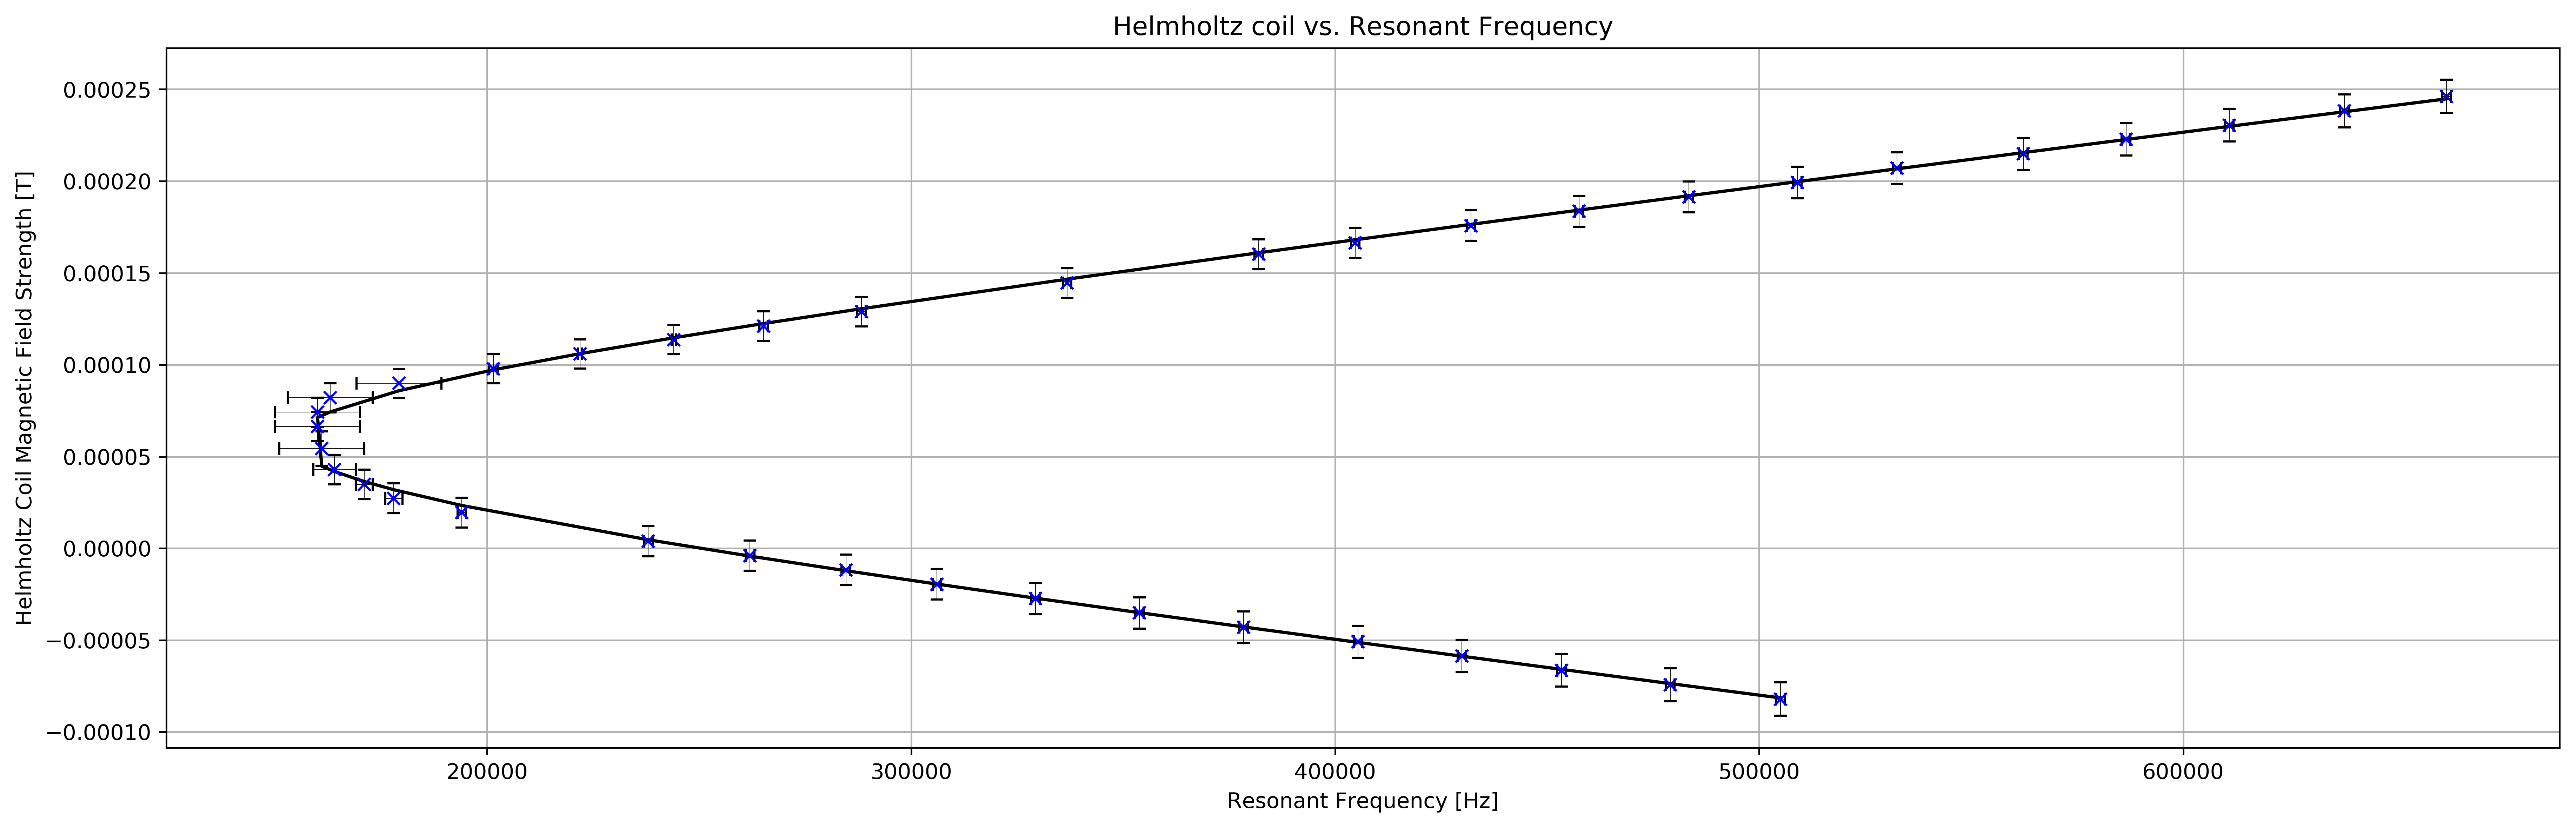

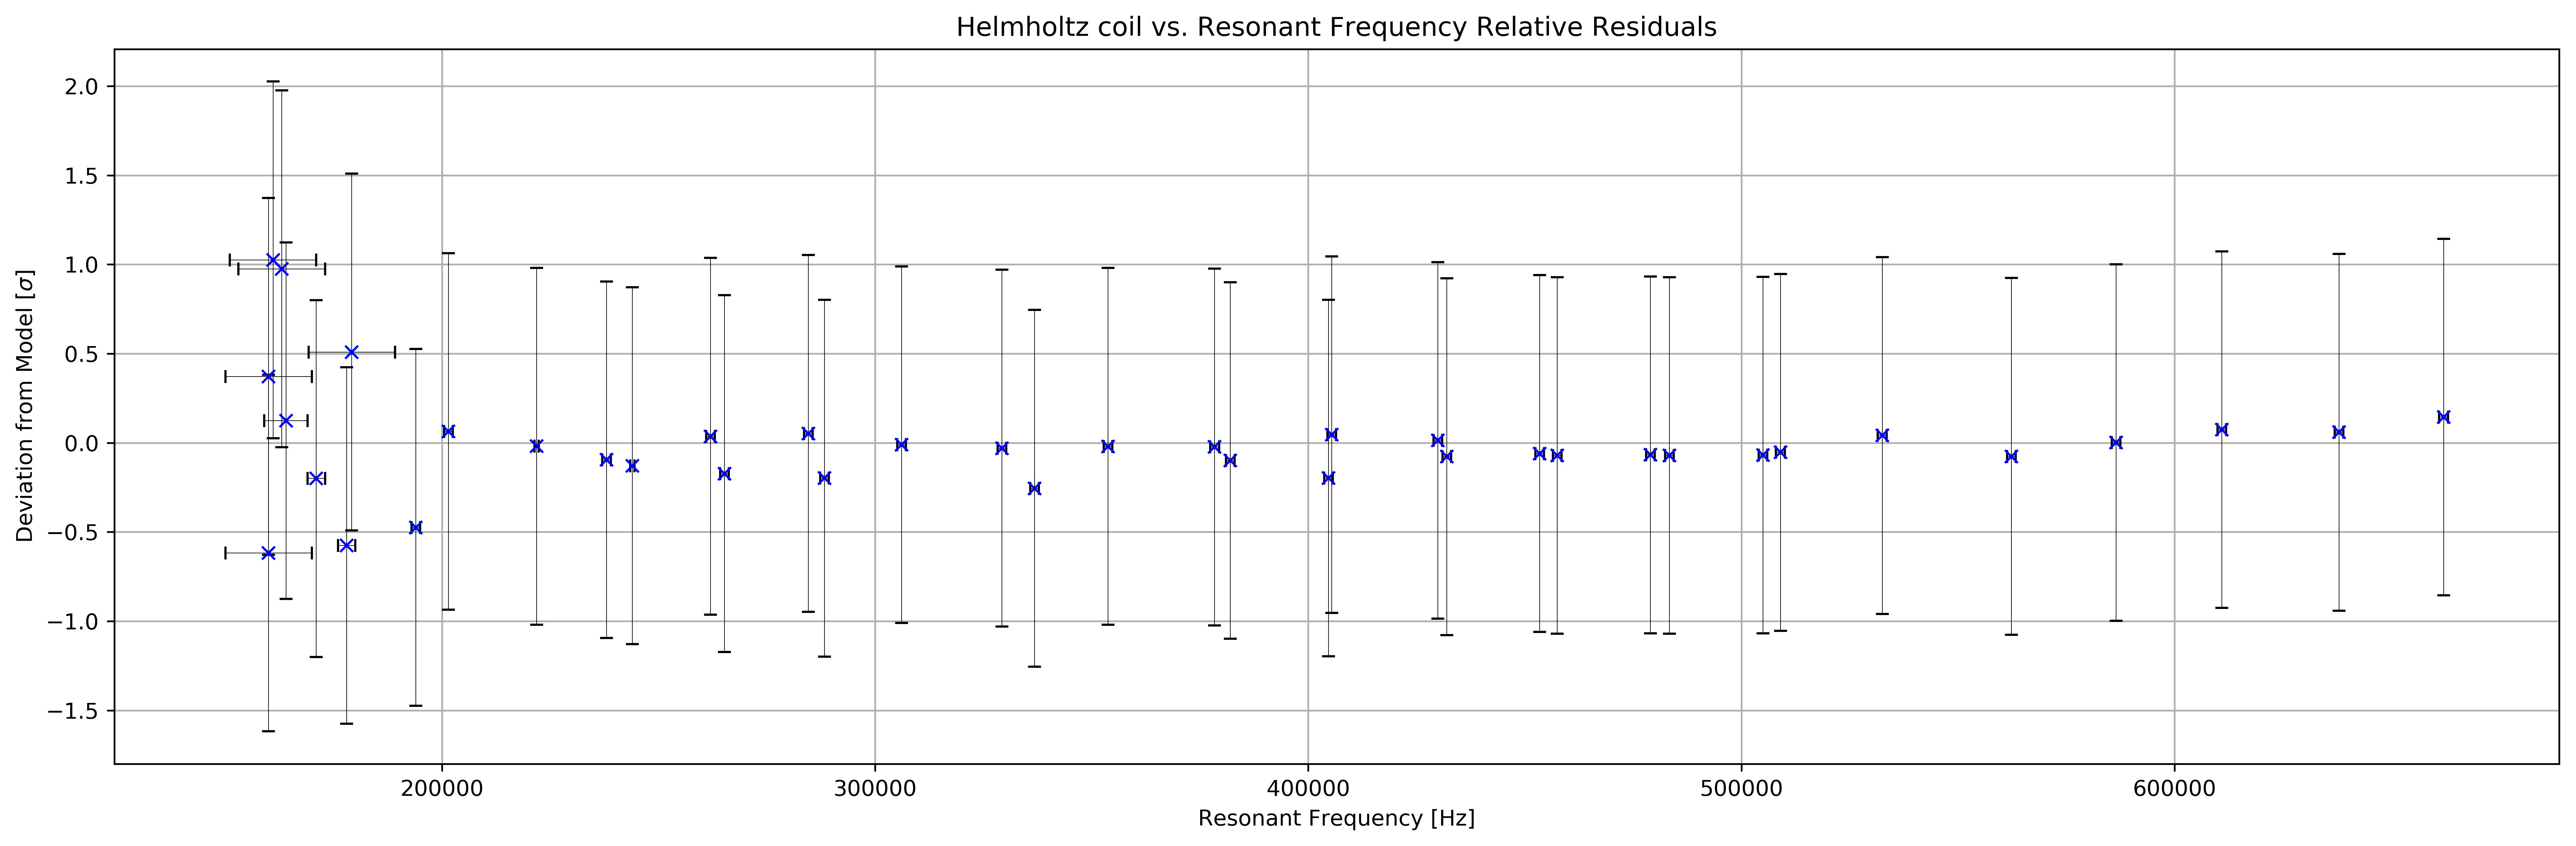

Finished


In [19]:
    #ROTATED FIT

#Plot Fitted Data
filename = input()
image = plt.figure(num=None, figsize=(20, 6), dpi=(200 + quality *80));
plt.errorbar(V,B,dB,dV,'bx','k',0.3,3);
plt.plot(V,MagFit(V,MaCo[0],MaCo[1],MaCo[2],MaCo[3]),'k-')
plt.grid(True);
plt.title("Helmholtz coil vs. Resonant Frequency");
plt.xlabel(r'Resonant Frequency [Hz]');
plt.ylabel(r'Helmholtz Coil Magnetic Field Strength [T]');
plt.show();
if(filename != "n"):
        image.savefig("MagFit\\Data\\" + filename +" " 
            + datetime.datetime.fromtimestamp(time.time())
                      .strftime('%Y-%m-%d %H,%M,%S, '))
    
#Plot Residual Data
image = plt.figure(num=None, figsize=(20, 6), dpi=(200 + quality *80));
Resid = [((j - i)/dj) for i, j, dj 
         in zip(MagFit(V,MaCo[0],MaCo[1],MaCo[2],MaCo[3]),B,dB) ]

plt.errorbar(V,Resid,ones(len(Resid)),dV,'bx','k',0.3,3);
plt.grid(True);
plt.title("Helmholtz coil vs. Resonant Frequency Relative Residuals");
plt.xlabel(r'Resonant Frequency [Hz]');
plt.ylabel(r'Deviation from Model [$\sigma$]');
plt.show();


if filename != "n":
        image.savefig("MagFit\\Residuals\\" + filename +" "
            + datetime.datetime.fromtimestamp(time.time())
                .strftime('%Y-%m-%d %H,%M,%S, '))

        file = open("MagFit\\Details\\" + filename +" " 
            + datetime.datetime.fromtimestamp(time.time())
                .strftime('%Y-%m-%d %H,%M,%S, '),"w")

        file.write("a = " + str(MaCo[0]) +"\n")
        file.write("b = " + str(MaCo[1]) +"\n")
        file.write("c = " + str(MaCo[2]) +"\n")
        file.write("d = " + str(MaCo[3]) +"\n")
        file.write("ChiSqu = " + str(MaChi) +"\n")
    
        file.write("\n")
    
        file.write(str(MaCv))

        file.close()
print("Finished");
plt.show()

# Appendices



<IPython.core.display.Javascript object>


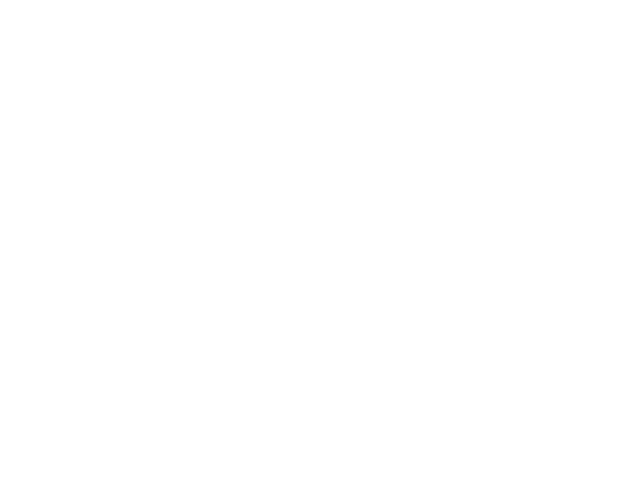

KeyboardInterrupt: 

In [21]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')

def gauss(x,y,mux,muy,sigx,sigy):
    return exp(-(x-mux)**2/(2*sigx**2)-(y-muy)**2/(2*sigy**2))
                                           
# Make data.
X = linspace(min(B)*2, max(B)*1.4, 5000)
Y = linspace(min(V)*0.3, max(V)*1.2, 5000)
X, Y = meshgrid(X, Y)

Z = sum(gauss(X,Y,B[i],V[i],5*dB[i],dV[i]) for i in range(len(B)))
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2E'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2E'))

ax.set_title("Possibility of measurement model")
ax.set_xlabel("Magnetic Flux Density (T)")
ax.set_ylabel("Resonant Frequency (Hz)")
ax.set_zlabel("Probability of Measurement")
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Here I use the methods taught in the book to convert the gaussian distribution of the Flux Density (Implied by the raw data and uncertainties) into the expected probability density function on $\nu$ I also plot the actual measured probability density function of the $\nu$ measurements and overlay them to compare.
$$ \nu (B) = a \sqrt{b + (B+c)^2} + d$$
$$ f(x,\mu,\sigma) = \frac{exp(\frac{(x-\mu)^2}{-\sigma^2})}{\sqrt{2\pi\sigma^2}} $$
$$ P \ is \ the \ p.d.f. \ of \ \nu \ the \ model \ predicts.$$
$$ P(B) = f(B(\nu),B_i,\Delta B_i) \ \times \ \mid\frac{dB}{d\nu}\mid $$

That's not too hard to implement...

The issue I'm facing is that the likelihood equation is:
$$\prod^{n}_{i=1}\Big[ P_i(B_i,\Theta) \Big]$$

But we have no random variables from these pdfs, as all of our measurements of $B$ and $\nu$ are pdfs in their own right??? Am I not supposed to be able to compare

<IPython.core.display.Javascript object>


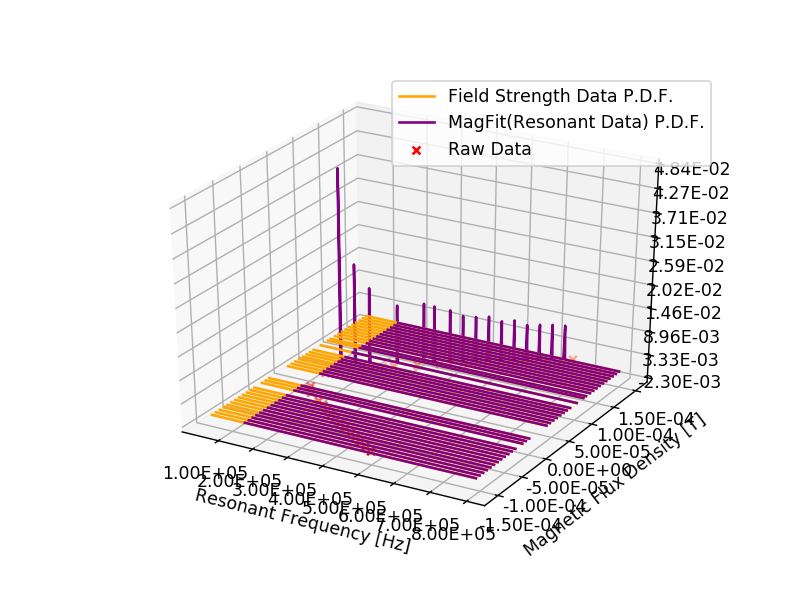

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


In [11]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection = '3d')

def Bravo(x,a,b,c,d):
    return sqrt((((x-d)/a)**2)+b)-c
def dBdV (x,a,b,c,d):
    return (x-d)/(a**2 * sqrt(((x-d)/a)**2-b))
def f(x,mu,sig):
    return (2*pi*sig**2)**-0.5 * exp((x-mu)**2*-sig**-2)
def P(x,mu,sig):
    def K(x,a,b,c,d):
        return f(Bravo(x,a,b,c,d),mu,sig) * abs(dBdV(x,a,b,c,d))
    return K

# Make data.
kV = linspace(min(V)*0.3, max(V)*1.2, 1000)
kB = [[i]*1000 for i in B]
# Plot the surface.
for i in range(len(B)):
    A = f(kV,V[i],dV[i]) ## Data
    Z = P(kV,B[i],dB[i])(kV,NuCo[0],NuCo[1],NuCo[2],NuCo[3]) ## Model
    if i == 0:
        ax.plot3D(kV, kB[:][i], A, 'orange', label = "Field Strength Data P.D.F.")
        ax.plot3D(kV, kB[:][i], 25*Z, 'purple', label = "MagFit(Resonant Data) P.D.F.")
    else: 
        ax.plot3D(kV, kB[:][i], A, 'orange')
        ax.plot3D(kV, kB[:][i], 25*Z, 'purple')

ax.scatter(V, B, [4e-04]*len(B), c = "red", marker = 'x', label = "Raw Data")
# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.2E'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2E'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2E'))
plt.legend()
ax.set_title("")
ax.set_xlabel("Resonant Frequency [Hz]")
ax.set_ylabel("Magnetic Flux Density [T]")
# Add a color bar which maps values to colors.

plt.show()

<IPython.core.display.Javascript object>


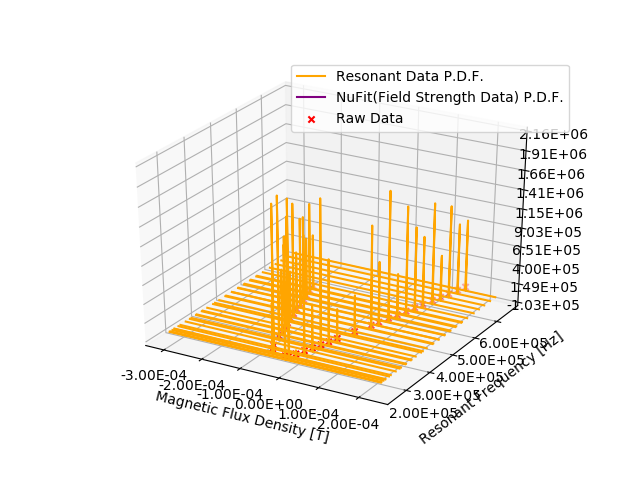

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in sqrt


In [13]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection = '3d')

def dVdB (x,a,b,c,d):
    return (x-d)/(a**2 * sqrt(((x-d)/a)**2-b))
def f(x,mu,sig):
    return (2*pi*sig**2)**-0.5 * exp((x-mu)**2*-sig**-2)
def P(x,mu,sig):
    def K(x,a,b,c,d):
        return f(NuFit(x,a,b,c,d),mu,sig) * abs(dVdB(x,a,b,c,d))
    return K

# Make data.
kB = linspace(min(B)*2, max(B)*1.5, 1000)
kV = [[i]*1000 for i in V]
# Plot the surface.
for i in range(len(B)):
    A = f(kB,B[i],dB[i]) ## Data
    Z = P(kB,V[i],dV[i])(kB,NuCo[0],NuCo[1],NuCo[2],NuCo[3]) ## Model
    if i == 0:
        ax.plot3D(kB, kV[:][i], A, 'orange', label = "Resonant Data P.D.F.")
        ax.plot3D(kB, kV[:][i], 4e18*Z, 'purple', label = "NuFit(Field Strength Data) P.D.F.")
    else:
        ax.plot3D(kB, kV[:][i], A, 'orange')
        ax.plot3D(kB, kV[:][i], 4e18*Z, 'purple')
        
ax.scatter(B, V, [5e4]*len(B), c = "red", marker = 'x', label = "Raw Data")

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.2E'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2E'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2E'))

ax.set_title("")
ax.set_xlabel("Magnetic Flux Density [T]")
ax.set_ylabel("Resonant Frequency [Hz]")
# Add a color bar which maps values to colors.
plt.legend()
plt.show()

after discussing with Iacopo I'm going to implement this equation to see if it gives a good value of Likelihood

$$L(\Theta) = \int_B \Bigg( \prod^n_{i=0} \Bigg[\frac{exp(\frac{(B-B_i)^2}{-\sigma_{B_i}^2})}{\sqrt{2\pi\sigma_{B_i}^2}}\times\frac{exp(\frac{(\nu(B)-\nu_i)^2}{-\sigma_{\nu_i}^2})}{\sqrt{2\pi\sigma_{\nu_i}^2}}\Bigg] \Bigg) dB$$

In [ ]:
from scipy import integrate

def PDF(x, i):
    P_B = (1/(sqrt(2*pi*dB[i]**2)) * exp(-(x-B[i])**2/(2*dB[i]**2)))
    P_V = (1/(sqrt(2*pi*dV[i]**2)) * exp(-(NuFit(x,NuCo[0],NuCo[1],NuCo[2],NuCo[3])-V[i])**2/(2*dV[i]**2)))
    return P_B*P_V

def MultiplicativeLikelihood(x):
    t = 1
    for i in range(len(B)):
        t *= PDF(x, i)
    return t

print(integrate.quad(MultiplicativeLikelihood, -inf, inf)[0])
           
print(integrate.quad(MultiplicativeLikelihood, -inf, inf)[0])